In [1]:
library(data.table)
library(dtplyr)
library(arules)
library(plyr)
setwd('E:\\kaggle\\market_basket')

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [44]:
orders <- fread('orders.csv')
products <- fread('products.csv')
op_train <- fread('order_products__train.csv')
op_prior <- fread('order_products__prior.csv')
aisles <- fread('aisles.csv')
departments <- fread('departments.csv')

Read 3421083 rows and 7 (of 7) columns from 0.101 GB file in 00:00:04
Read 32434489 rows and 4 (of 4) columns from 0.538 GB file in 00:00:15


In [16]:
orders$order_hour_of_day <- as.numeric(orders$order_hour_of_day)
products$product_name <- as.factor(products$product_name)

In [17]:
dim(orders)
dim(products)
dim(op_train)
dim(op_prior)
dim(aisles)
dim(departments)

[1] 3421083       7

[1] 49688     4

[1] 1384617       4

[1] 32434489        4

[1] 134   2

[1] 21  2

In [18]:
# Number of missing values anywhere in the table
sum(is.na(orders))
sum(is.na(products))
sum(is.na(op_train))
sum(is.na(op_prior))
sum(is.na(aisles))
sum(is.na(departments))

[1] 206209

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [19]:
sapply(orders, function(x) sum(is.na(x)))

order_id                user_id               eval_set 
                     0                      0                      0 
          order_number              order_dow      order_hour_of_day 
                     0                      0                      0 
days_since_prior_order 
                206209

Only days_sine_prior_order column from Orders table have missing values

In [20]:
# Replace missing values to -1
orders[["days_since_prior_order"]][is.na(orders[["days_since_prior_order"]])] <- -1

In [21]:
# combine aisles, departments and products (left joined to products)
goods = merge(x=merge(products,departments,by = "department_id"), y=aisles, by = "aisle_id") 

In [22]:
dim(goods)

[1] 49688     6

In [23]:
# Merge Orders and Order_products_train data
train_orders = merge(op_train,orders,x.all=TRUE,by = 'order_id')

In [ ]:
train_order_details = merge(train_orders,goods,x.all=TRUE,by='product_id')

In [24]:
# Merge Orders and Order_products_prior data
prior_orders = merge(op_prior,orders,x.all = TRUE,by='order_id')

In [ ]:
prior_train_orders = prior_orders[user_id %in% unique(train_orders$user_id)]

In [ ]:
prior_train_order_details = merge(prior_train_orders,goods,x.all=TRUE,by='product_id')

In [25]:
#setorderv(prior_orders,"order_number")

In [26]:
prior_train_orders[user_id==1]

order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2539329,196,1,0,1,prior,1,2,8,-1
2539329,14084,2,0,1,prior,1,2,8,-1
2539329,12427,3,0,1,prior,1,2,8,-1
2539329,26088,4,0,1,prior,1,2,8,-1
2539329,26405,5,0,1,prior,1,2,8,-1
2398795,196,1,1,1,prior,2,3,7,15
2398795,10258,2,0,1,prior,2,3,7,15
2398795,12427,3,1,1,prior,2,3,7,15
2398795,13176,4,0,1,prior,2,3,7,15
2398795,26088,5,1,1,prior,2,3,7,15


In [27]:
setorderv(train_orders,"order_number")

In [28]:
train_orders[user_id==1]

order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1187899,196,1,1,1,train,11,4,8,14
1187899,25133,2,1,1,train,11,4,8,14
1187899,38928,3,1,1,train,11,4,8,14
1187899,26405,4,1,1,train,11,4,8,14
1187899,39657,5,1,1,train,11,4,8,14
1187899,10258,6,1,1,train,11,4,8,14
1187899,13032,7,1,1,train,11,4,8,14
1187899,26088,8,1,1,train,11,4,8,14
1187899,27845,9,0,1,train,11,4,8,14
1187899,49235,10,1,1,train,11,4,8,14


We See that, for user_id = 1, 10 of the prior orders are present in prior_order dataset and the 11th order in train data. Let's combine these two to get our train dataset.

Also,

Reordered colomn will tell us if the product is begin ordered for the first time or not.

order number will give us the sequence of order

add_to_cart_order gives us the sequence by which the product is added to cart

In [31]:
# append prior_in_train and train_orders
#train_prior_orders <- rbindlist(list(prior_in_train,train_orders),use.names=TRUE)

In [ ]:
# perpare test data
#test_orders <- orders[eval_set=='test']

In [40]:
#prior_test_orders = prior_orders[user_id %in% unique(test_orders$user_id)]

In [41]:
#prior_test_order_details = merge(prior_test_orders,goods,x.all=TRUE,by='product_id')

In [ ]:
write.csv('test_orders.csv')

In [2]:
train=fread('train.csv')

Read 22026608 rows and 15 (of 15) columns from 1.988 GB file in 00:01:28


In [4]:
prior_test_order_details = fread('prior_test_order_details.csv')

Read 11792498 rows and 15 (of 15) columns from 1.064 GB file in 00:00:33


In [2]:
prior_train_order_details = fread('prior_test_order_details.csv')

Read 11792498 rows and 15 (of 15) columns from 1.064 GB file in 00:00:17


Association Analysis

In [7]:
head(prior_train_order_details)

order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
13,17330,1,0,45082,prior,2,6,17,1,light,27,5,alcohol,beers coolers
13,27407,2,0,45082,prior,2,6,17,1,chunky_salsa_medium,51,13,pantry,preserved dips spreads
13,35419,3,0,45082,prior,2,6,17,1,"handmade_vodka_from_austin,_texas",124,5,alcohol,spirits
13,196,4,0,45082,prior,2,6,17,1,soda,77,7,beverages,soft drinks
13,44635,5,0,45082,prior,2,6,17,1,salsa_con_queso_medium_dip,51,13,pantry,preserved dips spreads
13,26878,6,0,45082,prior,2,6,17,1,g_series_lime_cucumber_sports_drink,64,7,beverages,energy sports drinks


In [26]:
# select 10 unique user id
#head(unique(prior_train_order_details$user_id),5)
#association.data = prior_train_order_details[user_id %in% head(unique(prior_train_order_details$user_id),5)]

[1]  45082  54901 174840 118860 193635

In [3]:
association.data = prior_train_order_details[user_id %in% head(unique(prior_train_order_details$user_id),1)]

In [4]:
dim(association.data)
length(unique(association.data$order_id))
length(unique(association.data$product_id))

[1] 67 15

[1] 10

[1] 39

In [302]:
head(association.data)

order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
13,17330,1,0,45082,prior,2,6,17,1,light,27,5,alcohol,beers coolers
13,27407,2,0,45082,prior,2,6,17,1,chunky_salsa_medium,51,13,pantry,preserved dips spreads
13,35419,3,0,45082,prior,2,6,17,1,"handmade_vodka_from_austin,_texas",124,5,alcohol,spirits
13,196,4,0,45082,prior,2,6,17,1,soda,77,7,beverages,soft drinks
13,44635,5,0,45082,prior,2,6,17,1,salsa_con_queso_medium_dip,51,13,pantry,preserved dips spreads
13,26878,6,0,45082,prior,2,6,17,1,g_series_lime_cucumber_sports_drink,64,7,beverages,energy sports drinks


Approach 1, single format file with order_id and product_name columns

In [87]:
df = association.data[,c("order_id","product_name")]
dim(df)
df=unique(df)
dim(df)
df$product_name = as.factor(df$product_name)

[1] 67  2

[1] 67  2

In [65]:
txn = as(split(df$product_name, df$order_id), "transactions")
#write.csv(df,'test1.csv',row.names=FALSE)
#txn = read.transactions('test1.csv',format='single',sep=',', cols = c(1,2))

In [66]:
inspect(txn)

     items                                                 transactionID
[1]  {chunky_salsa_medium,                                              
      diet_tonic_water,                                                 
      g_series_lime_cucumber_sports_drink,                              
      hampshire_100%_natural_sour_cream,                                
      handmade_vodka_from_austin,_texas,                                
      lemon_lime_thirst_quencher,                                       
      lemonade,                                                         
      light,                                                            
      original_potato_chips,                                            
      philadelphia_original_cream_cheese,                               
      salsa_con_queso_medium_dip,                                       
      soda,                                                             
      sparkling_natural_mineral_water}             

In [74]:
summary(txn)

transactions as itemMatrix in sparse format with
 11 rows (elements/itemsets/transactions) and
 40 columns (items) and a density of 0.1545455 

most frequent items:
                       honey_nut_cheerios 
                                        4 
original_nooks_&_crannies_english_muffins 
                                        4 
                                   banana 
                                        3 
                              blueberries 
                                        3 
                     organic_blackberries 
                                        3 
                                  (Other) 
                                       51 

element (itemset/transaction) length distribution:
sizes
 1  3  4  5  6  7  9 10 13 
 1  1  2  1  2  1  1  1  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   6.000   6.182   8.000  13.000 

includes extended item information - examples:
                            labels
1                      

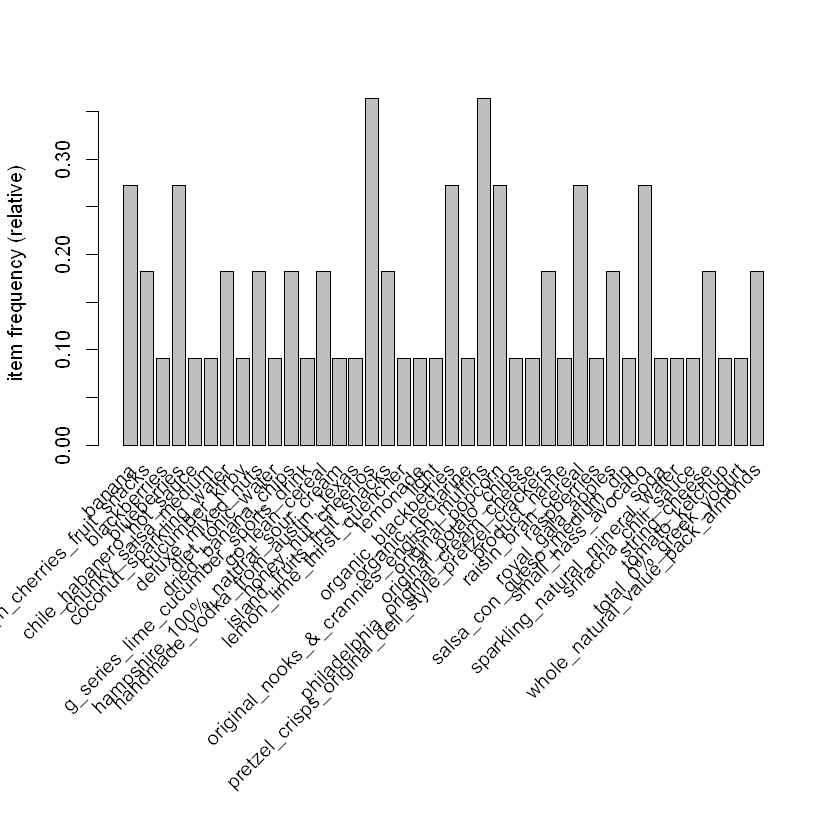

In [75]:
itemFrequencyPlot(txn)

In [76]:
rules <- apriori(txn,parameter = list(supp = 0.1, conf = 0.5, target = "rules",maxlen=4))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
      4  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[40 item(s), 11 transaction(s)] done [0.00s].
sorting and recoding items ... [18 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(txn, parameter = list(supp = 0.1, conf = 0.5, target = "rules", :
"Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!"

 done [0.01s].
writing ... [665 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [77]:
rules

set of 665 rules 

In [78]:
inspect(head(sort(rules, by="lift"),10));

     lhs                                   rhs                                  support confidence lift
[1]  {royal_gala_apples}                => {go_lean_cereal}                   0.1818182          1  5.5
[2]  {go_lean_cereal}                   => {royal_gala_apples}                0.1818182          1  5.5
[3]  {berries_'n_cherries_fruit_snacks} => {coconut_sparkling_water}          0.1818182          1  5.5
[4]  {coconut_sparkling_water}          => {berries_'n_cherries_fruit_snacks} 0.1818182          1  5.5
[5]  {berries_'n_cherries_fruit_snacks} => {dried_banana_chips}               0.1818182          1  5.5
[6]  {dried_banana_chips}               => {berries_'n_cherries_fruit_snacks} 0.1818182          1  5.5
[7]  {berries_'n_cherries_fruit_snacks} => {island_fruits_fruit_snacks}       0.1818182          1  5.5
[8]  {island_fruits_fruit_snacks}       => {berries_'n_cherries_fruit_snacks} 0.1818182          1  5.5
[9]  {berries_'n_cherries_fruit_snacks} => {whole_natural_value_

In [16]:
col=c('order_id',levels(df$aisle))
df=df[,lapply(levels(df$aisle), function(x) sum(aisle==x)),keyby=.(order_id)]
colnames(df)=col

In [17]:
cols=colnames(df)
df = df[,(cols):=lapply(.SD,as.factor),.SDcols = cols]

In [213]:
#association.data = ddply(association.data,c('order_id'),function(association.data) paste(association.data$aisle, collapse=','))

In [344]:
#df = ddply(df,c('order_id'),function(df) paste(df$aisle, collapse=','))

In [345]:
#setnames(df,'V1','department')